<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li></ul></div>

# Dependencies

In [1]:
library(dplyr)
library(reshape2)
library(ggbeeswarm)
library(gridExtra)
library(gtable)
library(grid)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Functions

In [2]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")

# Paths

In [3]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [4]:
load(paste0(datapath,"ESTIMATE/estimate_manifest_primary_clean_final.RData"))

In [5]:
load(paste0(datapath,"ESTIMATE/PDX_estimate.RData"))

In [6]:
head(PDX_estimate)

,SampleID,StromalScore,ImmuneScore,ESTIMATEScore
,<chr>,<dbl>,<dbl>,<dbl>
1,BT084_XP3_2,-2344.085,-2726.465,-5070.550
2,BT084_XP5_845,-2410.261,-2776.284,-5186.546
3,Icb_984MB_XP11,-2532.593,-2675.994,-5208.588
4,Med113FH_P0.4,-2563.930,-2565.153,-5129.082
5,Med113FH_P5.2,-2636.448,-2386.213,-5022.662
6,Med114FH_P5.3,-2567.810,-2773.827,-5341.637


In [7]:
PDX_estimate_itcc <- read.table(paste0(datapath, "ESTIMATE/ESTIMATE_output/RNAseq_itcc-P4_TPM_values_210726_estimateOutput.txt"),
                               sep = "\t", stringsAsFactors = F, header = T)

In [8]:
PDX_estimate_itcc <- PDX_estimate_itcc[grep(paste(c("EP", "MB", "HG", "NB", "RT"),collapse="|"),PDX_estimate_itcc$NAME),]

In [9]:
PDX_estimate_itcc <- PDX_estimate_itcc[grep(paste(c("PP", "PT", "PR", "PM"),collapse="|"),PDX_estimate_itcc$NAME),]

In [10]:
dim(PDX_estimate_itcc)

[1] 61  4

In [11]:
#remove
PDX_estimate_itcc <- PDX_estimate_itcc[!PDX_estimate_itcc$NAME %in% c("ITCC.P4_s07_HG0068_PT01_F01_R01_A03", "ITCC.P4_s15_NB0537_PT03_F01_R01_03"), ]

In [12]:
colnames(PDX_estimate_itcc)[1] <- "SampleID"

In [13]:
PDX_estimate <- rbind(PDX_estimate, PDX_estimate_itcc)

In [14]:
dim(PDX_estimate)

[1] 79  4

Subset for ImmuneScore only

In [15]:
mycol <- c("aliquot_id", "StromalScore", "ImmuneScore","ESTIMATEScore", "sample_id", "group", "cohort")

In [16]:
estimate_df <- estimate_manifest_primary_clean[,mycol]

add in PDX

In [17]:
summary(PDX_estimate$ImmuneScore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -2948   -2749   -2614   -2536   -2397   -1133 

In [18]:
PDX_estimate$group <- "ICGC"
PDX_estimate$cohort <- "PDX"
colnames(PDX_estimate)[1] <- "aliquot_id"
PDX_estimate$sample_id <- PDX_estimate$aliquot_id

In [19]:
head(estimate_df)

,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,sample_id,group,cohort
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,TARGET-30-PAIFXV-01A-01R,-537.97880,483.8556,-54.1232,TARGET-30-PAIFXV-01A,TARGET,NBL
2,TARGET-30-PAIPGU-01A-01R,-319.22630,1240.6492,921.4229,TARGET-30-PAIPGU-01A,TARGET,NBL
3,TARGET-30-PAISNS-01A-01R,-899.30090,-128.2337,-1027.5347,TARGET-30-PAISNS-01A,TARGET,NBL
4,TARGET-30-PAITCI-01A-01R,-327.26820,200.6735,-126.5947,TARGET-30-PAITCI-01A,TARGET,NBL
5,TARGET-30-PAIVHE-01A-01R,-15.87499,1033.6469,1017.7719,TARGET-30-PAIVHE-01A,TARGET,NBL
6,TARGET-30-PAIXIF-01A-01R,460.15050,978.1672,1438.3177,TARGET-30-PAIXIF-01A,TARGET,NBL


In [20]:
estimate_ped_pdx <- rbind(estimate_df,PDX_estimate)

In [21]:
head(estimate_ped_pdx)

,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,sample_id,group,cohort
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,TARGET-30-PAIFXV-01A-01R,-537.97880,483.8556,-54.1232,TARGET-30-PAIFXV-01A,TARGET,NBL
2,TARGET-30-PAIPGU-01A-01R,-319.22630,1240.6492,921.4229,TARGET-30-PAIPGU-01A,TARGET,NBL
3,TARGET-30-PAISNS-01A-01R,-899.30090,-128.2337,-1027.5347,TARGET-30-PAISNS-01A,TARGET,NBL
4,TARGET-30-PAITCI-01A-01R,-327.26820,200.6735,-126.5947,TARGET-30-PAITCI-01A,TARGET,NBL
5,TARGET-30-PAIVHE-01A-01R,-15.87499,1033.6469,1017.7719,TARGET-30-PAIVHE-01A,TARGET,NBL
6,TARGET-30-PAIXIF-01A-01R,460.15050,978.1672,1438.3177,TARGET-30-PAIXIF-01A,TARGET,NBL


Add in dummy variables to separate adult and ped

In [22]:
emptyvar <- as.data.frame(matrix(ncol = 7, nrow = 2))
colnames(emptyvar) <- colnames(estimate_ped_pdx)

In [23]:
emptyvar$group <- as.character(emptyvar$group)
emptyvar$cohort <- as.character(emptyvar$cohort)

In [24]:
emptyvar[1,"aliquot_id"] <- "empty1"
emptyvar[2,"aliquot_id"] <- "empty2"

emptyvar[1,"sample_id"] <- "empty1"
emptyvar[2,"sample_id"] <- "empty2"

emptyvar[1,"ImmuneScore"] <- 3500
emptyvar[2,"ImmuneScore"] <- 3500

emptyvar[1,"cohort"] <- "EMPTY1"
emptyvar[2,"cohort"] <- "EMPTY2"

In [25]:
estimate_ped_pdx <- rbind(estimate_ped_pdx,emptyvar)

In [26]:
estimate_ped_pdx$percread <- 8.0947988*exp(estimate_ped_pdx$ImmuneScore*0.0006267)

In [27]:
immune.cohorts <- cbind(NA, unique(estimate_ped_pdx$cohort))
colnames(immune.cohorts) <- c("group","cohort")
immune.cohorts <- as.data.frame(immune.cohorts)

immune.cohorts$group <- as.character(immune.cohorts$group)

In [28]:
adults <- c("PRAD", "LGG", "OV", "SKCM", "COAD", "GBM", "LUAD")

peds <- c("PDX","ETMR", "MB", "ATRT", "EPN", "pedHGG", "CP", "NBL", "pedLGG", "CPH", "MNG", "SCHW", "NFB")

In [29]:
immune.cohorts[immune.cohorts$cohort %in% adults, 1] <- "Adult"
immune.cohorts[immune.cohorts$cohort %in% peds, 1] <- "Pediatric"

immune.cohorts[immune.cohorts$cohort == "EMPTY1",1] <- "Pediatric"
immune.cohorts[immune.cohorts$cohort == "EMPTY2",1] <- "Pediatric"

Get median immunescore and order

In [30]:
for(i in 1:nrow(immune.cohorts)){
    immune.cohorts$median_immunereads[i]<-median(estimate_ped_pdx$percread[estimate_ped_pdx$cohort == immune.cohorts$cohort[i]])}

In [31]:
tmp <- immune.cohorts[which(immune.cohorts$group == "Pediatric"),]
tmp1 <- immune.cohorts[which(immune.cohorts$group == "Adult"),]
immune.cohorts <- rbind(tmp,tmp1)

In [32]:
immune.cohorts$cohort <- factor(immune.cohorts$cohort, levels = c("PDX","ETMR", "MB", "ATRT", "EPN", "pedHGG", "CP", 
                                                                  "NBL", "pedLGG", "CPH",  "MNG", "SCHW", "NFB", 
                                                                  "EMPTY1","EMPTY2", "PRAD", "LGG", "OV", "SKCM", 
                                                                  "COAD", "GBM", "LUAD"))                                          

In [33]:
immune.cohorts <- immune.cohorts[order(immune.cohorts$cohort),]

In [34]:
immune.cohorts

,group,cohort,median_immunereads
,<chr>,<fct>,<dbl>
20,Pediatric,PDX,1.573260
19,Pediatric,ETMR,2.737464
12,Pediatric,MB,2.797472
17,Pediatric,ATRT,5.450459
14,Pediatric,EPN,5.961374
13,Pediatric,pedHGG,6.612176
16,Pediatric,CP,7.346129
1,Pediatric,NBL,8.826792
11,Pediatric,pedLGG,10.185701


Get X positions for increasing immunescore in each cancer type

In [35]:
disease.width <- (nrow(estimate_ped_pdx)/nrow(immune.cohorts)) 
sorted.estimate_ped_pdx <- estimate_ped_pdx[0,]

start = 0
for(i in 1:(nrow(immune.cohorts))){
    tmp <- estimate_ped_pdx[estimate_ped_pdx$cohort == immune.cohorts$cohort[i],]
    tmp <- tmp[order(tmp$percread),] 
    #create range of x values to squeeze dots into equal widths of the plot for each Disease regardless of the number of samples
    div <- disease.width/nrow(tmp)
    #If there is only one sample, put the dot in the middle of the alloted space
    if(dim(tmp)[1]==1)
    {
      tmp$Xpos<-start+(disease.width/2)
    } else tmp$Xpos<-seq(from = start, to = start+disease.width, by = div)[-1]
    
    sorted.estimate_ped_pdx<-rbind(sorted.estimate_ped_pdx,tmp)  
    immune.cohorts$Median.start[i] <- tmp$Xpos[1]
    immune.cohorts$Median.stop[i] <- tmp$Xpos[nrow(tmp)]
    immune.cohorts$N[i]<-nrow(tmp)
    
    start <- start+disease.width+30
    
}

position median line to center of each cancer type

In [36]:
(immune.cohorts)

,group,cohort,median_immunereads,Median.start,Median.stop,N
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<int>
20,Pediatric,PDX,1.573260,1.990219,157.2273,79
19,Pediatric,ETMR,2.737464,204.696970,344.4545,9
12,Pediatric,MB,2.797472,375.210446,531.6818,208
17,Pediatric,ATRT,5.450459,566.753666,718.9091,31
14,Pediatric,EPN,5.961374,751.327972,906.1364,65
13,Pediatric,pedHGG,6.612176,938.030668,1093.3636,83
16,Pediatric,CP,7.346129,1133.190341,1280.5909,16
1,Pediatric,NBL,8.826792,1311.632149,1467.8182,151
11,Pediatric,pedLGG,10.185701,1498.345790,1655.0455,298


In [37]:
immune.cohorts$medianloc <- immune.cohorts$Median.start+((immune.cohorts$Median.stop-immune.cohorts$Median.start)/2)

order based on median dataframe

In [38]:
sorted.estimate_ped_pdx$cohort <- factor(sorted.estimate_ped_pdx$cohort, levels = levels(immune.cohorts$cohort))     

In [39]:
head(sorted.estimate_ped_pdx)

,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,sample_id,group,cohort,percread,Xpos
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>
5410,ITCC.P4_s01_MB0041_PP01_F01_R01_A03,-2553.480,-2947.849,-5501.329,ITCC.P4_s01_MB0041_PP01_F01_R01_A03,ICGC,PDX,1.276095,1.990219
6610,ITCC.P4_s01_MB0049_PP02_F01_R01_A03,-2678.776,-2929.615,-5608.391,ITCC.P4_s01_MB0049_PP02_F01_R01_A03,ICGC,PDX,1.290761,3.980437
712,Med1512FH_P0.3,-2525.776,-2916.426,-5442.202,Med1512FH_P0.3,ICGC,PDX,1.301474,5.970656
5510,ITCC.P4_s01_MB0041_PP02_F01_R01_A03,-2470.460,-2875.561,-5346.021,ITCC.P4_s01_MB0041_PP02_F01_R01_A03,ICGC,PDX,1.335235,7.960875
85,Med1512FH_P5.416,-2496.354,-2862.779,-5359.132,Med1512FH_P5.416,ICGC,PDX,1.345974,9.951093
6510,ITCC.P4_s01_MB0047_PP03_F01_R01_A03,-2373.144,-2827.697,-5200.842,ITCC.P4_s01_MB0047_PP03_F01_R01_A03,ICGC,PDX,1.375894,11.941312


In [40]:
rmEMPTY <- rep("black",22)
rmEMPTY[14:15] <- "white"

In [41]:
immune.cohorts$color_crossbar <- NA

immune.cohorts$color_crossbar[immune.cohorts$cohort == "EMPTY1"] <- "white"
immune.cohorts$color_crossbar[immune.cohorts$cohort == "EMPTY2"] <- "white"

immune.cohorts$color_crossbar[is.na(immune.cohorts$color_crossbar)] <- "black"

In [42]:
cohort_col

PDX      ETMR       MNG        MB      SCHW      ATRT       EPN    pedHGG 
"#878787" "#76afa9" "#a6cee3" "#1f78b4" "#678ba5" "#33a02c" "#e31a1c" "#fdbf6f" 
   pedLGG       NFB       CPH        CP       NBL      SKCM       LGG       GBM 
"#8763ae" "#cab2d6" "#cccc7a" "#a9a9a9" "#b2df8a" "#7c9c60" "#753a00" "#6a3d9a" 
       OV      PRAD      LUAD      COAD    EMPTY1    EMPTY2 
"#afaf78" "#a85426" "#ad3837" "#726579" "#FFFFFF" "#FFFFFF"

In [43]:
immuneplot <- ggplot() + 
geom_point(data = sorted.estimate_ped_pdx, aes(x = Xpos ,y = percread, color = cohort), 
           size = 7, shape = 20) +

geom_crossbar(data = immune.cohorts, 
                   aes(x = medianloc,y = median_immunereads, color = color_crossbar,
                       ymin = median_immunereads,ymax = median_immunereads), width = disease.width) +
myaxis + myplot +
theme(axis.title.x = element_blank(),
      axis.text.x = element_text(angle = 45, hjust = 1, color = rmEMPTY)) +
scale_color_manual(values = c(cohort_col, "white" = "white", "black" = "black"), guide = FALSE) +
scale_x_continuous(breaks = seq((disease.width)/2,max(sorted.estimate_ped_pdx$Xpos),
                                disease.width+30), labels = immune.cohorts$cohort, expand = c(0,20)) + 
scale_y_continuous(breaks = seq(0, 70, by = 10)) + 
labs(y = "% Immune Reads") 

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


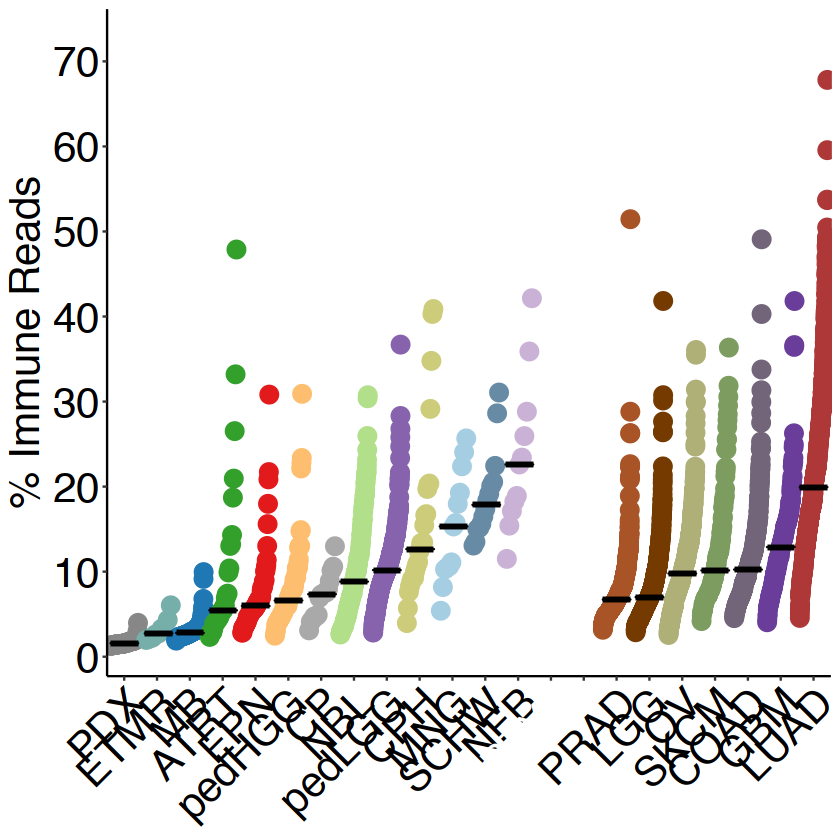

In [44]:
immuneplot

In [45]:
pdf(file = paste0(plotpath,"Immunereads_Splot.pdf"),
        width = 20, height = 8, useDingbats = FALSE)
print(immuneplot)
dev.off()

pdf 
  2